<a href="https://colab.research.google.com/github/Sriharish19/Heineken_assignment/blob/main/Heineken_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/My_drive')

Mounted at /content/My_drive


In [46]:
import pandas as pd

data = pd.read_csv('/content/My_drive/MyDrive/Heineken International/TransactionData.csv',header=None)
transactions = []
transactions = data.values.tolist()


In [47]:
transaction=transactions

In [48]:
transaction = [[elem for elem in sublst if not pd.isna(elem)] for sublst in transaction]


In [49]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
binary_data = pd.DataFrame(te_ary, columns=te.columns_)

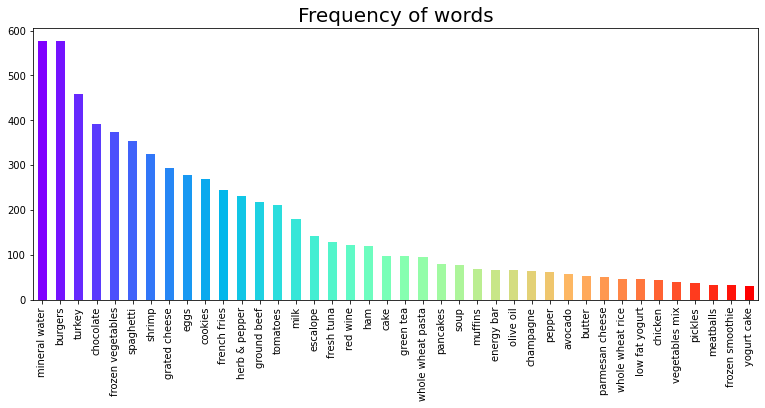

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
color=plt.cm.rainbow(np.linspace(0,1,40))
data[0].value_counts().head(40).plot.bar(color=color,figsize=(13,5))
plt.title('Frequency of words',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [51]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(binary_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules.sort_values(['support','confidence'], ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
274,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
275,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
85,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
84,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
128,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
129,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
244,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
245,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
218,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
219,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672


In [52]:
shrimp_rules = rules[rules['antecedents'].apply(lambda x: 'shrimp' in str(x))]
shrimp_rules = shrimp_rules.sort_values(['confidence'], ascending=False)
shrimp_rules.head(4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
270,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144
294,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209
92,(shrimp),(chocolate),0.071457,0.163845,0.017998,0.251866,1.537221,0.006290,1.117654
250,(shrimp),(milk),0.071457,0.129583,0.017598,0.246269,1.900474,0.008338,1.154811


In [53]:
transaction1=transaction

for i in transaction1:
  if 'mineral water' in i:
    i.remove('mineral water')
    

In [54]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transaction1).transform(transaction1)
binary_data = pd.DataFrame(te_ary, columns=te.columns_)

In [55]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(binary_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules.sort_values(['support','confidence'], ascending=False)
rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
200,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
85,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581
84,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070
201,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
121,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081
120,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592
101,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232
100,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640
220,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
221,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043
